# Introducción, objetivos y contenido
====================================================================================================================================

# Importación de librerías
====================================================================================================================================

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st

# Carga de datos
====================================================================================================================================

## Datos de Google

In [7]:
data_reviews_ny = pd.read_json("../Data/Exploración/Google/3_new_york.json",lines=True)

In [6]:
metadata_8 = pd.read_json("../Data/Exploración/Google/8_metadata.json",lines=True)

## Datos de Yelp

In [12]:
yelp_business = pd.read_pickle("../Data/Exploración/Yelp/business.pkl")

# Check

In [8]:
data_reviews_ny.head(5)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.121598e+20,Kevin Noble,1531531850612,4,Large electrical wholesaler with very good sto...,None,None,0x89d9f3c896fd648f:0x26e65f259859802f
1,1.120503e+20,Joseph Hanover,1471217722578,4,Good service and they know what those talking ...,None,None,0x89d9f3c896fd648f:0x26e65f259859802f
2,1.055255e+20,morice lee,1604339382504,4,Best,None,None,0x89d9f3c896fd648f:0x26e65f259859802f
3,1.112953e+20,Joe Milano,1544139014031,5,Excellant service and atmosphere,None,None,0x89d9f3c896fd648f:0x26e65f259859802f
4,1.037596e+20,Joe R,1552236266839,5,Has it all,None,None,0x89d9f3c896fd648f:0x26e65f259859802f


In [9]:
metadata_8.head(5)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,Discount Smoke Shop,"Discount Smoke Shop, 4400 Woodson Rd, St. Loui...",0x87df3418c268c2fd:0x22bc9dd6fc002c3e,"Discount retailer of cigarettes, cigars & othe...",38.729393,-90.356932,"[Tobacco shop, Cigar shop, Lottery retailer, V...",4.4,48,None,"[[Friday, 7AM–8PM], [Saturday, 7AM–7PM], [Sund...","{'Service options': ['Same-day delivery'], 'Ac...",Permanently closed,"[0x87df34956be9ce81:0xd16d24ce057d168b, 0x87df...",https://www.google.com/maps/place//data=!4m2!3...
2,Teppanyaki & Sushi Buffet,"Teppanyaki & Sushi Buffet, 6710 W Kellogg Dr, ...",0x87bae0c50d626c33:0xbfec787e2fc75206,Restaurant featuring a buffet with sushi & oth...,37.674919,-97.420456,"[Sushi restaurant, Restaurant]",3.6,1694,$$,"[[Friday, 11AM–8PM], [Saturday, 11AM–8PM], [Su...","{'Service options': ['Takeout', 'Dine-in', 'De...",Closed ⋅ Opens 11AM Sat,"[0x87bae11b8f9db04d:0x310e8e8c5a4a3306, 0x87ba...",https://www.google.com/maps/place//data=!4m2!3...
3,American Display & Fixture,"American Display & Fixture, 3600 N Hawthorne S...",0x886060672b860c57:0x8ce8aac55f240111,None,35.083761,-85.251825,"[Car factory, General contractor]",4.2,8,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x88605e572a2cf8df:0x3e6534c112fe9e24, 0x8860...",https://www.google.com/maps/place//data=!4m2!3...
4,H&R Block,"H&R Block, 3757 Belt Line Rd, Addison, TX 75001",0x864c26c17b5fa467:0xe37e1efd993170b1,None,32.953633,-96.853368,"[Tax preparation service, Tax consultant]",3.9,48,None,None,"{'Service options': ['Online appointments'], '...",None,"[0x864c26de3a7d0c39:0xc703db0eaec98e60, 0x864c...",https://www.google.com/maps/place//data=!4m2!3...


In [13]:
yelp_business.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploración
====================================================================================================================================

## Google

### Reseñas

In [15]:
# Se explora la base de datos inicial.
data_reviews_ny.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.121598e+20,Kevin Noble,1531531850612,4,Large electrical wholesaler with very good sto...,None,None,0x89d9f3c896fd648f:0x26e65f259859802f
1,1.120503e+20,Joseph Hanover,1471217722578,4,Good service and they know what those talking ...,None,None,0x89d9f3c896fd648f:0x26e65f259859802f
2,1.055255e+20,morice lee,1604339382504,4,Best,None,None,0x89d9f3c896fd648f:0x26e65f259859802f
3,1.112953e+20,Joe Milano,1544139014031,5,Excellant service and atmosphere,None,None,0x89d9f3c896fd648f:0x26e65f259859802f
4,1.037596e+20,Joe R,1552236266839,5,Has it all,None,None,0x89d9f3c896fd648f:0x26e65f259859802f


In [14]:
# Se observa la composición inicial del dataset. 
data_reviews_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  150000 non-null  float64
 1   name     150000 non-null  object 
 2   time     150000 non-null  int64  
 3   rating   150000 non-null  int64  
 4   text     85318 non-null   object 
 5   pics     4909 non-null    object 
 6   resp     17494 non-null   object 
 7   gmap_id  150000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 9.2+ MB


In [16]:
data_reviews_ny.describe()

,user_id,time,rating
count,1.500000e+05,1.500000e+05,150000.000000
mean,1.094169e+20,1.554282e+12,4.321800
std,5.168927e+18,4.750449e+10,1.154233
min,1.000001e+20,6.626016e+11,1.000000
25%,1.049891e+20,1.526128e+12,4.000000
50%,1.093544e+20,1.558276e+12,5.000000
75%,1.138822e+20,1.591292e+12,5.000000
max,1.184466e+20,1.627862e+12,5.000000


In [17]:
data_reviews_ny["rating"].value_counts(normalize=True)

rating
5    0.654367
4    0.172320
3    0.079240
1    0.065180
2    0.028893
Name: proportion, dtype: float64

### Negocios

In [18]:
metadata_8.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,Discount Smoke Shop,"Discount Smoke Shop, 4400 Woodson Rd, St. Loui...",0x87df3418c268c2fd:0x22bc9dd6fc002c3e,"Discount retailer of cigarettes, cigars & othe...",38.729393,-90.356932,"[Tobacco shop, Cigar shop, Lottery retailer, V...",4.4,48,None,"[[Friday, 7AM–8PM], [Saturday, 7AM–7PM], [Sund...","{'Service options': ['Same-day delivery'], 'Ac...",Permanently closed,"[0x87df34956be9ce81:0xd16d24ce057d168b, 0x87df...",https://www.google.com/maps/place//data=!4m2!3...
2,Teppanyaki & Sushi Buffet,"Teppanyaki & Sushi Buffet, 6710 W Kellogg Dr, ...",0x87bae0c50d626c33:0xbfec787e2fc75206,Restaurant featuring a buffet with sushi & oth...,37.674919,-97.420456,"[Sushi restaurant, Restaurant]",3.6,1694,$$,"[[Friday, 11AM–8PM], [Saturday, 11AM–8PM], [Su...","{'Service options': ['Takeout', 'Dine-in', 'De...",Closed ⋅ Opens 11AM Sat,"[0x87bae11b8f9db04d:0x310e8e8c5a4a3306, 0x87ba...",https://www.google.com/maps/place//data=!4m2!3...
3,American Display & Fixture,"American Display & Fixture, 3600 N Hawthorne S...",0x886060672b860c57:0x8ce8aac55f240111,None,35.083761,-85.251825,"[Car factory, General contractor]",4.2,8,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x88605e572a2cf8df:0x3e6534c112fe9e24, 0x8860...",https://www.google.com/maps/place//data=!4m2!3...
4,H&R Block,"H&R Block, 3757 Belt Line Rd, Addison, TX 75001",0x864c26c17b5fa467:0xe37e1efd993170b1,None,32.953633,-96.853368,"[Tax preparation service, Tax consultant]",3.9,48,None,None,"{'Service options': ['Online appointments'], '...",None,"[0x864c26de3a7d0c39:0xc703db0eaec98e60, 0x864c...",https://www.google.com/maps/place//data=!4m2!3...


In [21]:
metadata_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275001 entries, 0 to 275000
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              274998 non-null  object 
 1   address           269343 non-null  object 
 2   gmap_id           275001 non-null  object 
 3   description       35654 non-null   object 
 4   latitude          275001 non-null  float64
 5   longitude         275001 non-null  float64
 6   category          273864 non-null  object 
 7   avg_rating        275001 non-null  float64
 8   num_of_reviews    275001 non-null  int64  
 9   price             38052 non-null   object 
 10  hours             211785 non-null  object 
 11  MISC              223255 non-null  object 
 12  state             215364 non-null  object 
 13  relative_results  250182 non-null  object 
 14  url               275001 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 31.5+ MB


In [20]:
metadata_8.describe()

,latitude,longitude,avg_rating,num_of_reviews
count,275001.000000,275001.000000,275001.000000,275001.000000
mean,37.341146,-92.238039,4.305749,109.725888
std,5.427185,16.297844,0.661190,403.381540
min,-40.929308,-177.373493,1.000000,1.000000
25%,33.621095,-98.649895,4.000000,8.000000
50%,38.247463,-87.508577,4.500000,26.000000
75%,41.281926,-80.301179,4.800000,60.000000
max,70.133941,180.000000,5.000000,9998.000000


<Axes: xlabel='avg_rating', ylabel='Count'>

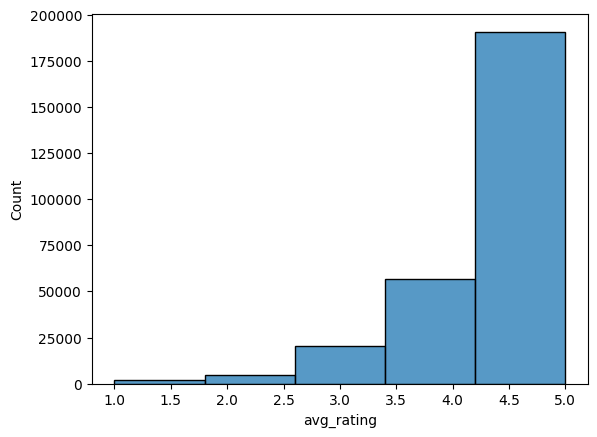

In [24]:
sns.histplot(metadata_8,x="avg_rating",bins=5)

In [26]:
categorias_metadata = metadata_8[["gmap_id","category"]]

In [37]:
categorias_metadata = categorias_metadata.explode("category")
categorias_metadata.head()

,gmap_id,category
0,0x88f16e41928ff687:0x883dad4fd048e8f8,Pharmacy
1,0x87df3418c268c2fd:0x22bc9dd6fc002c3e,Tobacco shop
1,0x87df3418c268c2fd:0x22bc9dd6fc002c3e,Cigar shop
1,0x87df3418c268c2fd:0x22bc9dd6fc002c3e,Lottery retailer
1,0x87df3418c268c2fd:0x22bc9dd6fc002c3e,Vaporizer store


In [42]:
len(categorias_metadata["category"].unique())

3772

In [44]:
categorias_metadata["category"].value_counts(normalize=True).head(20)

category
Restaurant              0.023272
Auto repair shop        0.012453
Gas station             0.011267
Beauty salon            0.009628
Convenience store       0.008954
Fast food restaurant    0.008849
Hair salon              0.007773
Park                    0.007669
Nail salon              0.007435
Church                  0.007291
Bar                     0.007279
Grocery store           0.006840
Clothing store          0.006732
Tourist attraction      0.006472
American restaurant     0.006444
Coffee shop             0.005941
Barber shop             0.005743
ATM                     0.005586
Sandwich shop           0.005484
Tire shop               0.005380
Name: proportion, dtype: float64

In [52]:
metadata_8_misc = metadata_8[["gmap_id","MISC"]]
metadata_8_misc.head()

,gmap_id,MISC
0,0x88f16e41928ff687:0x883dad4fd048e8f8,"{'Service options': ['In-store shopping', 'Sam..."
1,0x87df3418c268c2fd:0x22bc9dd6fc002c3e,"{'Service options': ['Same-day delivery'], 'Ac..."
2,0x87bae0c50d626c33:0xbfec787e2fc75206,"{'Service options': ['Takeout', 'Dine-in', 'De..."
3,0x886060672b860c57:0x8ce8aac55f240111,{'Accessibility': ['Wheelchair accessible entr...
4,0x864c26c17b5fa467:0xe37e1efd993170b1,"{'Service options': ['Online appointments'], '..."


In [53]:
x = pd.json_normalize(metadata_8_misc["MISC"])
metadata_8_misc = pd.concat([metadata_8_misc, x], axis=1).drop('MISC', axis=1)
metadata_8_misc.head()

,gmap_id,Service options,Health & safety,Accessibility,Planning,Payments,Highlights,Popular for,Offerings,Dining options,Amenities,Atmosphere,Crowd,Health and safety,From the business,Recycling,Getting here,Activities
0,0x88f16e41928ff687:0x883dad4fd048e8f8,"[In-store shopping, Same-day delivery]","[Mask required, Staff required to disinfect su...",[Wheelchair accessible entrance],[Quick visit],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0x87df3418c268c2fd:0x22bc9dd6fc002c3e,[Same-day delivery],NaN,[Wheelchair accessible entrance],NaN,"[Checks, Debit cards]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0x87bae0c50d626c33:0xbfec787e2fc75206,"[Takeout, Dine-in, Delivery]","[Mask required, Staff required to disinfect su...","[Wheelchair accessible entrance, Wheelchair ac...",NaN,NaN,"[Great dessert, Great tea selection]","[Lunch, Dinner, Solo dining]","[All you can eat, Coffee, Comfort food, Quick ...",[Dessert],"[Good for kids, High chairs]",[Casual],"[Groups, Tourists]",NaN,NaN,NaN,NaN,NaN
3,0x886060672b860c57:0x8ce8aac55f240111,NaN,NaN,[Wheelchair accessible entrance],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0x864c26c17b5fa467:0xe37e1efd993170b1,[Online appointments],"[Mask required, Staff wear masks]",[Wheelchair accessible entrance],NaN,NaN,NaN,NaN,NaN,NaN,[Restroom],NaN,NaN,NaN,NaN,NaN,NaN,NaN
